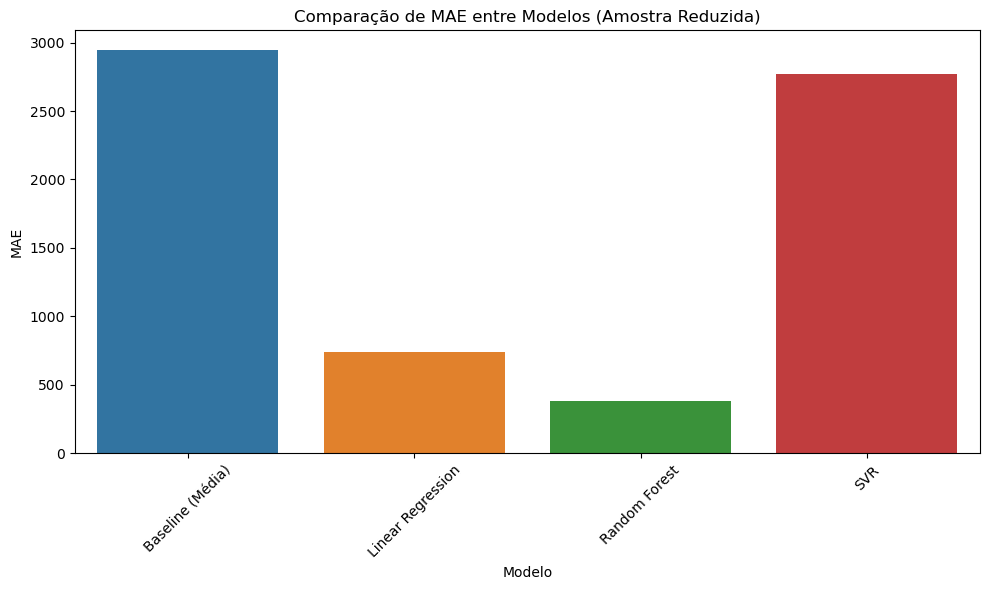

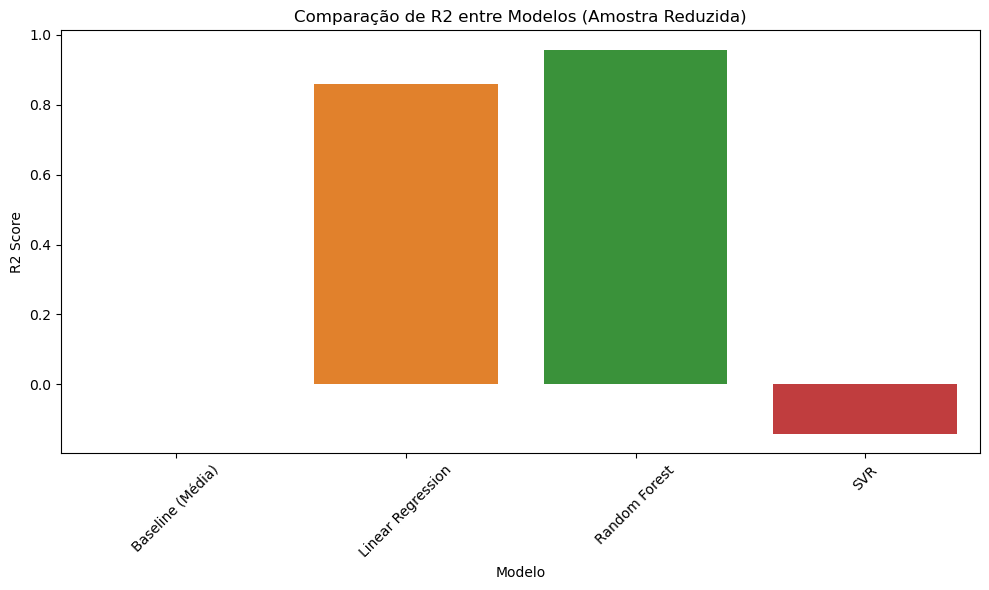

                           MAE        R2
Baseline (Média)   2941.734358 -0.000243
Linear Regression   742.402907  0.858162
Random Forest       384.410883  0.958184
SVR                2766.899651 -0.143341


In [1]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = r'C:\Users\menon\OneDrive\Documentos\Menon\CarlaMenon\Diamonds Prices2022.csv'
data = pd.read_csv(file_path, sep=";")

# Limpeza e preparação dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])
data_encoded = pd.get_dummies(data_cleaned, columns=['cut', 'color', 'clarity'], drop_first=True)

# Amostragem para acelerar o processo
sampled_data = data_encoded.sample(n=10000, random_state=42)
X = sampled_data.drop(columns=['price'])
y = sampled_data['price']

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurando validação cruzada (3-folds)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Modelos
models = {
    'Baseline (Média)': None,
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Função de avaliação
def evaluate_model(model, X_train, y_train, kf, y_test=None, baseline=False):
    if baseline:
        baseline_pred = [y_train.mean()] * len(y_test)
        return {
            'MAE': mean_absolute_error(y_test, baseline_pred),
            'R2': r2_score(y_test, baseline_pred)
        }
    else:
        mae_scorer = make_scorer(mean_absolute_error)
        r2_scorer = 'r2'
        mae_score = cross_val_score(model, X_train, y_train, cv=kf, scoring=mae_scorer).mean()
        r2_score_mean = cross_val_score(model, X_train, y_train, cv=kf, scoring=r2_scorer).mean()
        return {
            'MAE': mae_score,
            'R2': r2_score_mean
        }

# Avaliação dos modelos
results = {'Baseline (Média)': evaluate_model(None, X_train, y_train, kf, y_test, baseline=True)}
for model_name, model in models.items():
    if model_name != 'Baseline (Média)':
        model.fit(X_train, y_train)
        results[model_name] = evaluate_model(model, X_train, y_train, kf)

# Convertendo resultados para DataFrame
results_df = pd.DataFrame(results).T

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.title('Comparação de MAE entre Modelos (Amostra Reduzida)')
plt.ylabel('MAE')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('Comparação de R2 entre Modelos (Amostra Reduzida)')
plt.ylabel('R2 Score')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibindo resultados
print(results_df)


